In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [2]:
data= pd.read_csv('tesla.csv')
data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
data.shape

(1692, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


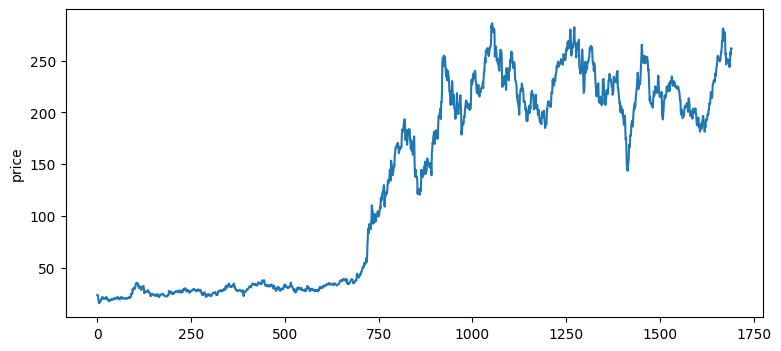

In [6]:
plt.figure(figsize=(9,4))
plt.plot(data['Close'])
plt.ylabel('price')
plt.show()

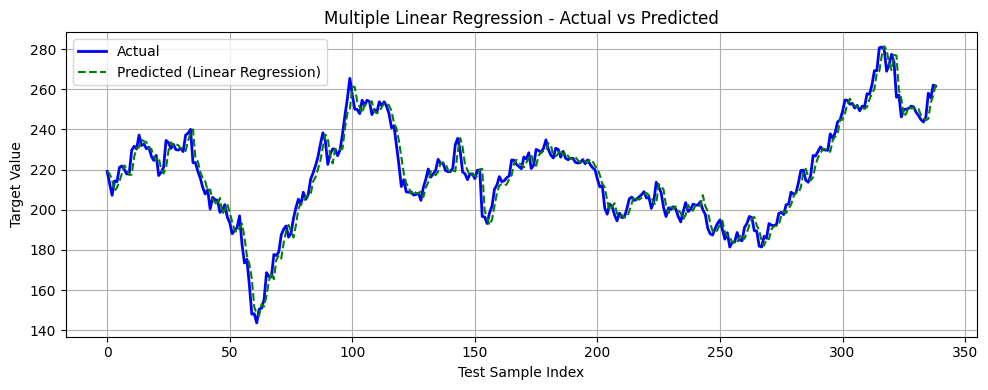

Multiple Linear Regression Evaluation:
MSE: 28.84
MAE: 3.97
R² Score: 0.95


In [8]:
import numpy as np
import matplotlib.pyplot as plt

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
data['Close'] = data['Close'].fillna(data['Close'].mean())
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
X = data[features].values
y = data['Target'].values

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # prevent division by zero
X_norm = (X - X_mean) / X_std

# Step 2: Calculate covariance matrix
cov_matrix = np.cov(X_norm, rowvar=False)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvectors by eigenvalues descending
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvalues = eigenvalues[sorted_index]

# Step 5: Select top k components (e.g., k=2)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]

# Step 6: Transform data
X_pca = np.dot(X_norm, eigenvector_subset)

# Step 1: Train-test split (80-20)
split = int(0.8 * len(X_pca))
X_train, X_test = X_pca[:split], X_pca[split:]
y_train, y_test = y[:split], y[split:]

# Step 2: Add bias (intercept) term
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Step 3: Compute weights using Normal Equation
XTX = X_train_bias.T @ X_train_bias
XTy = X_train_bias.T @ y_train
weights = np.linalg.inv(XTX) @ XTy

# Step 4: Predict on test data
y_pred = X_test_bias @ weights

# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(10, 4))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted (Linear Regression)', color='green', linestyle='--')
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.title('Multiple Linear Regression - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Evaluation
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("Multiple Linear Regression Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
